In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
x = 2*np.random.rand(100, 1)
y = 4+ 3 * x + np.random.randn(100, 1)
x_b = np.c_[np.ones((100, 1)), x]

In [31]:
n_epochs = 50
t0 , t1 = 5, 50
m = 100

In [32]:
def learning_schedule(t):
    return t0 / (t + t1)

In [33]:
theta = np.random.randn(2, 1)

In [34]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [35]:
theta

array([[3.99426439],
       [2.94684767]])

In [88]:
from sklearn.linear_model import SGDRegressor, Ridge, Lasso, ElasticNet
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [37]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.98926669]), array([2.88819826]))

In [53]:
m = 100
x = 6*np.random.rand(m, 1) - 3
y = 0.5 * x **2 + x + 2 + np.random.randn(m, 1)

In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
poly_features = PolynomialFeatures(degree =2 , include_bias= False)

In [56]:
x_poly = poly_features.fit_transform(x)

In [57]:
x[0], x_poly[0]

(array([1.90622331]), array([1.90622331, 3.63368731]))

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lin_reg = LinearRegression().fit(x_poly, y)

In [60]:
lin_reg.intercept_, lin_reg.coef_

(array([2.26190602]), array([[0.96089956, 0.49524203]]))

In [61]:
from sklearn.model_selection import train_test_split,
from sklearn.metrics import mean_squared_error

In [74]:
def plot_learning_cureves(model, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    train_error, val_error = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_error.append(mean_squared_error(y_train[:m], y_train_predict))
        val_error.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_error), 'r-+', lw=2,label='훈련세트')
    plt.plot(np.sqrt(val_error), 'b-+', lw=2,label='검증 세트')    
    plt.xlim(0, 80, 10)
    plt.ylim(0.0, 3.0, 0.5)

In [75]:
lin_reg = LinearRegression()

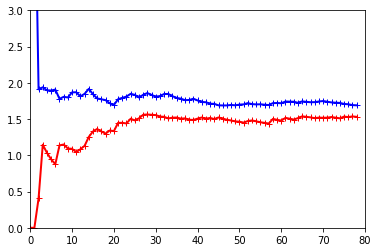

In [76]:
plot_learning_cureves(lin_reg, x, y)

In [77]:
from sklearn.pipeline import Pipeline

In [78]:
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

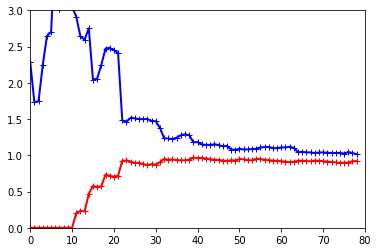

In [79]:
plot_learning_cureves(polynomial_regression, x, y)

In [81]:
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(x, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [82]:
ridge_reg.predict([[1.5]])

array([[5.12152137]])

In [84]:
# lasso = penalty = 'l1'
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(x, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [85]:
sgd_reg.predict([[1.5]])

array([5.10516324])

In [86]:
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(x, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [87]:
lasso_reg.predict([[1.5]])

array([5.07182876])

In [89]:
elanet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elanet.fit(x, y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [90]:
elanet.predict([[1.5]])

array([5.07238501])

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

In [102]:
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler()),
])

In [103]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [104]:
x_train_poly_scaled = poly_scaler.fit_transform(x_train)

In [105]:
x_val_poly_scaled = poly_scaler.transform(x_val)

In [106]:
sgd_reg = SGDRegressor(max_iter=1, tol=np.infty, warm_start=True, penalty =None, learning_rate="constant", eta0=0.0005)

In [107]:
mininum_val_error = float('inf')

In [108]:
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(x_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(x_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    
    if val_error < mininum_val_error:
        mininum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  Converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

In [109]:
best_epoch, best_model, mininum_val_error

(2,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
              shuffle=True, tol=inf, validation_fraction=0.1, verbose=0,
              warm_start=True),
 12.117906250560761)

In [110]:
from sklearn import datasets

In [111]:
iris = datasets.load_iris()

In [112]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [113]:
x = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
log_reg = LogisticRegression().fit(x,y)

In [120]:
x_new = np.linspace(0, 3, 1000).reshape(-1, 1)

In [121]:
y_proba = log_reg.predict_proba(x_new)

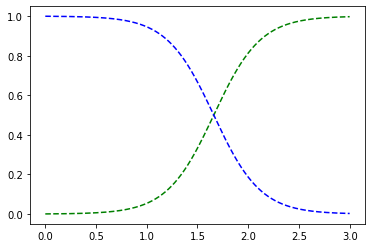

In [122]:
plt.plot(x_new, y_proba[:, 1], 'g--', label='iris virginica')
plt.plot(x_new, y_proba[:, 0], 'b--', label='iris virginica')

In [123]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [124]:
x = iris['data'][:, (2,3)]
y = iris['target']

In [127]:
softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10).fit(x,y)

In [128]:
softmax.predict([[5, 2]])

array([2])

In [129]:
softmax.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])